In [11]:
# Pandas : 데이터 사이언스를 위한 python package
# Pandas 모듈을 임포트 일반적으로 pd 별칭으로 임포트
import pandas as pd

# 판다스에서 csv(tsv) 불러오기
# read_csv 명령에 sep로 구분자를 부여(기본값은 ,)
df = pd.read_csv("./data/gapminder.tsv", sep="\t") #tsv


In [12]:
# 데이터 살펴보기
# 앞쪽 데이터의 확인
print(df.head()) # 기본값은 5개
("첫 3개 행")
print(df.head(3))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710


In [13]:
# 뒷쪽 행의 활인 :tail()
print(df.tail(6)) # 기본값은 5개 지정아면 그 갯수만큼

       country continent  year  lifeExp       pop   gdpPercap
1698  Zimbabwe    Africa  1982   60.363   7636524  788.855041
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [14]:
# 데이터 타입의 확인
print("type of df:", type(df))

type of df: <class 'pandas.core.frame.DataFrame'>


In [15]:
# 데이터타입의 크기
print("size of df:", df.shape) #tuple
"df는 {}행 {}열의 데이터 프레임".format(df.shape[0], df.shape[1])

size of df: (1704, 6)


'df는 1704행 6열의 데이터 프레임'

In [16]:
# df는 어떤 변수를 가지고 있는가 :columns
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [17]:
# df의 전반적인 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [22]:
# 각 컬럼의 자료형 확인
# daraFrame 자료형 object는 python str
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [24]:
# 단일 컬럼의 추출
# df.columns
countries = df['country']
print("type of countries:", type(countries)) # series
# 이 데이터를 기반으로 여러탐색작업을 수행할 수 있다
# 복수 개의 컬럼 추출
# 컬럼의 리스트를 제공하면 됨
subset = df[['country', 'continent', 'year']]
print("type of subset:", type(subset))
# Dataframe
subset.head()

type of countries: <class 'pandas.core.series.Series'>
type of subset: <class 'pandas.core.frame.DataFrame'>


,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [26]:
# 특정 행(관측치)의 추출
# loc : 숫자 이외릐 객체로도 지정 가능
#       변경 가능
# iloc : 행 번호(숫자)만으로 접근 가능
#       데이터 내용이 변경되지 않으면 항상 동일
print(df.loc[3]) #인덱스를 이용한 접근
print(df.iloc[3]) # 행 번호를 이용한 접근

print(type(df.iloc[3]))

country      Afghanistan
continent           Asia
year                1967
lifeExp            34.02
pop             11537966
gdpPercap        836.197
Name: 3, dtype: object
country      Afghanistan
continent           Asia
year                1967
lifeExp            34.02
pop             11537966
gdpPercap        836.197
Name: 3, dtype: object
<class 'pandas.core.series.Series'>


In [29]:
# 복수 개의 행의 추출
# 추출하고자 하는 행의 인덱스를 리스트로 전달
df.loc[[0, 99, 999]] # 0, 99, 999 인덱스 추출

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [34]:
# loc는 인덱스  iloc는 행번호
# iloc는 역인덱싱이 가능
#  가장 마지막 행을 추출
print("마지막 행 (loc):", df.loc[df.shape[0]-1])
print("마지막행(iloc):", df.iloc[-1]) # 가장 마지막
print("마지막행(tail):", df.tail(1))

마지막 행 (loc): country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
마지막행(iloc): country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
마지막행(tail):        country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [35]:
# 슬라이싱 구문을 이용한 행과 열의 추출
subset2 = df.loc[:, ["year", "pop"]]
# 전체 행 범위(:) 내에서"year", "pop" 컬럼
subset2.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [36]:
# 컬럼의 범위는 위치 인덱스로도 지정할 수 있다
subset3 = df.iloc[:, [2, 4, -1]]
# 전체 행 내에서 2번째, 4번째, 마지막 컬럼 추출
subset3.head()

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


In [37]:
# 범위 객체를 이용한 컬럼의 추출
r = range(4) # 0 ~ 3까지의 범위
df.iloc[:, r].head()
# 전체 행에서 0, 1, 2, 3번 위치의 컬럼 추출

,country,continent,year,lifeExp
0,Afghanistan,Asia,1952,28.801
1,Afghanistan,Asia,1957,30.332
2,Afghanistan,Asia,1962,31.997
3,Afghanistan,Asia,1967,34.020
4,Afghanistan,Asia,1972,36.088


In [38]:
# 통계치의 추출
# df의 lifeExp의 산술 평균
print("기대수명의 평균:", df['lifeExp'].mean())
df['lifeExp'].describe() # 기초 통계량

기대수명의 평균: 59.47443936619713


count    1704.000000
mean       59.474439
std        12.917107
min        23.599000
25%        48.198000
50%        60.712500
75%        70.845500
max        82.603000
Name: lifeExp, dtype: float64

In [39]:
# 데이터셋을 grouping(year)
grouped_year_df = df.groupby("year")
print(grouped_year_df)
print(type(grouped_year_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [40]:
# 그룹핑된 데이터셋의 컬럼의 기초통계량 계산
grouped_year_df['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [41]:
grouped_year_df.describe()

lifeExp                                                             \
       count       mean        std     min       25%      50%       75%   
year                                                                      
1952   142.0  49.057620  12.225956  28.801  39.05900  45.1355  59.76500   
1957   142.0  51.507401  12.231286  30.332  41.24750  48.3605  63.03675   
1962   142.0  53.609249  12.097245  31.997  43.46850  50.8810  65.23450   
1967   142.0  55.678290  11.718858  34.020  46.03375  53.8250  67.41950   
1972   142.0  57.647386  11.381953  35.400  48.50025  56.5300  69.24750   
1977   142.0  59.570157  11.227229  31.220  50.47550  59.6720  70.38250   
1982   142.0  61.533197  10.770618  38.445  52.94000  62.4415  70.92125   
1987   142.0  63.212613  10.556285  39.906  54.94075  65.8340  71.87725   
1992   142.0  64.160338  11.227380  23.599  56.12175  67.7030  72.58250   
1997   142.0  65.014676  11.559439  36.087  55.63375  69.3940  74.16975   
2002   142.0  65.694923  12.279823  39.193  55.52225  70.8255  75.45925   
2007   142.0  67.007423  12.073021  39.613  57.16025  71.9355  76.41325   

                pop                ...                            gdpPercap  \
         max  count          mean  ...          75%           max     count   
year                               ...                                        
1952  72.670  142.0  1.695040e+07  ...   9168197.75  5.562635e+08     142.0   
1957  73.470  142.0  1.876341e+07  ...   9817598.00  6.374080e+08     142.0   
1962  73.680  142.0  2.042101e+07  ...  10980084.50  6.657700e+08     142.0   
1967  74.160  142.0  2.265830e+07  ...  12614584.75  7.545500e+08     142.0   
1972  74.720  142.0  2.518998e+07  ...  14679199.50  8.620300e+08     142.0   
1977  76.110  142.0  2.767638e+07  ...  16670227.00  9.434550e+08     142.0   
1982  77.110  142.0  3.020730e+07  ...  18407324.75  1.000281e+09     142.0   
1987  78.670  142.0  3.303857e+07  ...  20947542.50  1.084035e+09     142.0   
1992  79.360  142.0  3.599092e+07  ...  22705382.50  1.164970e+09     142.0   
1997  80.690  142.0  3.883947e+07  ...  24311369.75  1.230075e+09     142.0   
2002  82.000  142.0  4.145759e+07  ...  26545556.25  1.280400e+09     142.0   
2007  82.603  142.0  4.402122e+07  ...  31210041.75  1.318683e+09     142.0   

                                                                        \
              mean           std         min          25%          50%   
year                                                                     
1952   3725.276046   9321.064786  298.846212   864.752389  1968.528344   
1957   4299.408345   9869.662202  335.997115   930.540819  2173.220291   
1962   4725.812342   8667.362525  355.203227  1059.149171  2335.439533   
1967   5483.653047   8095.315431  349.000000  1151.245103  2678.334741   
1972   6770.082815  10614.383403  357.000000  1257.193853  3339.129407   
1977   7313.166421   8362.489150  371.000000  1357.257252  3798.609244   
1982   7518.901673   7733.845006  424.000000  1363.338985  4216.228428   
1987   7900.920218   8288.281304  385.000000  1327.469823  4280.300366   
1992   8158.608521   9031.846080  347.000000  1270.660958  4386.085502   
1997   9090.175363  10171.493263  312.188423  1366.837958  4781.825478   
2002   9917.848365  11154.114865  241.165877  1409.567264  5319.804524   
2007  11680.071820  12859.937337  277.551859  1624.842248  6124.371109   

                                  
               75%           max  
year                              
1952   3913.492777  108382.35290  
1957   4876.356362  113523.13290  
1962   5709.381428   95458.11176  
1967   7075.932943   80894.88326  
1972   9508.839303  109347.86700  
1977  11204.102423   59265.47714  
1982  12347.953723   33693.17525  
1987  11994.052795   31540.97480  
1992  10684.351870   34932.91959  
1997  12022.867188   41283.16433  
2002  13359.512257   44683.97525  
2007  18008.835640   49357.19017  

[12 rows x 24 columns]

In [43]:
# 여러 컬럼의 산술 평균
grouped_year_df[['lifeExp', 'gdpPercap']].mean()

,lifeExp,gdpPercap
year,,
1952,49.057620,3725.276046
1957,51.507401,4299.408345
1962,53.609249,4725.812342
1967,55.678290,5483.653047
1972,57.647386,6770.082815
1977,59.570157,7313.166421
1982,61.533197,7518.901673
1987,63.212613,7900.920218
1992,64.160338,8158.608521


In [46]:
# Matplotlib를 이용한 시각화
life_exp = df.groupby('year')['lifeExp'].mean() # Plot의 Y 축 데이터
life_exp.head()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
Name: lifeExp, dtype: float64

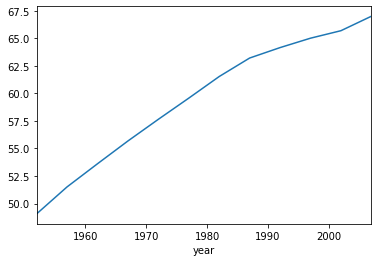

In [49]:
%matplotlib inline
# 차트를 그려봅니다
# matplotlib를 임포트하면
# Dataframe 내에 타츠 메서드들이
# 동적으로 추가된다
import matplotlib.pyplot as plt
# 별칭으로 plt 사용
life_exp.plot()